In [2]:
import mglearn
import numpy as np
from IPython.core.pylabtools import figsize


# KNN classification for Forge dataset

In [4]:
X, y =mglearn.datasets.make_forge()
print(X)
print(y)

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


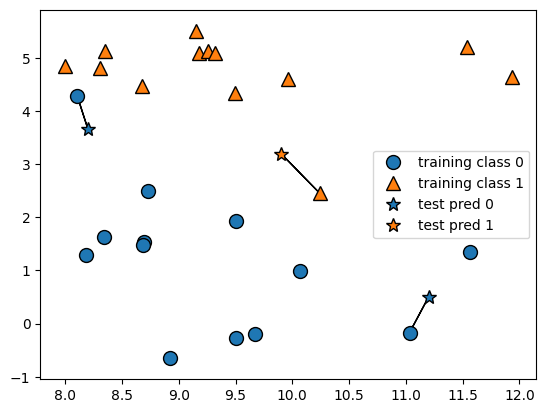

In [5]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

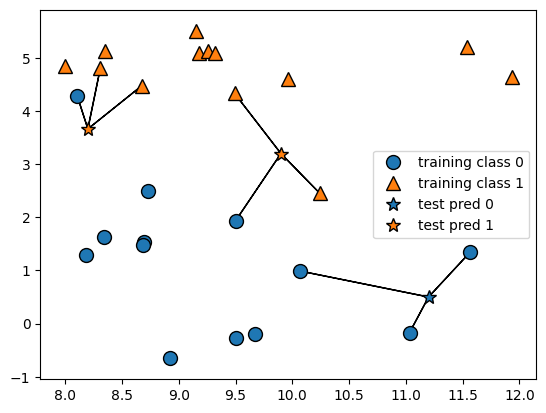

In [6]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

## KNN using Scikit learn library and involving the train-test-split for model generalizability assessment

In [9]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X ,y , random_state=0)
print("X_train...\n {}".format(X_train))
print("y_train...\n {}".format(y_train))
print("X_test...\n {}".format(X_test))
print("y_test...\n {}".format(y_test))

X_train...
 [[ 8.92229526 -0.63993225]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [ 7.99815287  4.8525051 ]
 [11.0329545  -0.16816717]
 [ 9.17748385  5.09283177]
 [11.563957    1.3389402 ]
 [ 9.15072323  5.49832246]
 [ 8.34810316  5.13415623]
 [11.93027136  4.64866327]
 [ 8.1062269   4.28695977]
 [ 8.67494727  4.47573059]
 [ 9.67284681 -0.20283165]
 [ 9.50169345  1.93824624]
 [ 8.69289001  1.54322016]
 [ 9.96346605  4.59676542]
 [ 9.50048972 -0.26430318]
 [ 9.25694192  5.13284858]
 [ 8.68937095  1.48709629]]
y_train...
 [0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0]
X_test...
 [[11.54155807  5.21116083]
 [10.06393839  0.99078055]
 [ 9.49123469  4.33224792]
 [ 8.18378052  1.29564214]
 [ 8.30988863  4.80623966]
 [10.24028948  2.45544401]
 [ 8.34468785  1.63824349]]
y_test...
 [1 0 1 0 1 1 0]


In [13]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors= 3)

In [14]:
clf.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


##### Making predictions

In [16]:
print("The test predictions are: {}". format(clf.predict(X_test)))

The test predictions are: [1 0 1 0 1 0 0]


##### Evaluation using an inbuilt function

In [18]:
print("The model accuracy is: {:.2f}%". format((clf.score(X_test, y_test))*100))

The model accuracy is: 85.71%


#### visualizing the decision boundary

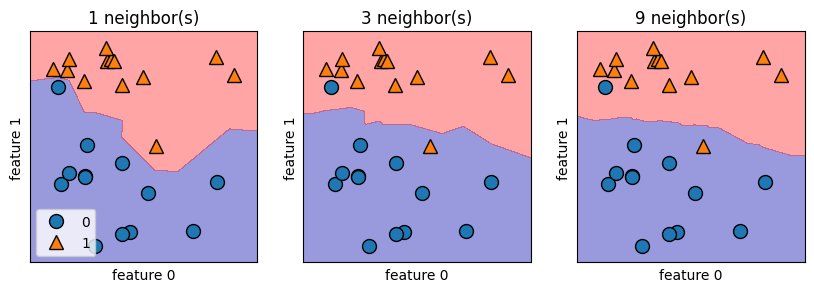

In [19]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
     # the fit method returns the object self, so we can instantiate
     # and fit in one line
     clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
     mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
     mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
     ax.set_title("{} neighbor(s)".format(n_neighbors))
     ax.set_xlabel("feature 0")
     ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

## Investigating the relationship between model complexity and generalization using the breast cancer dataset

In [27]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.data.shape)
print(cancer.target.shape)

(569, 30)
(569,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66
)

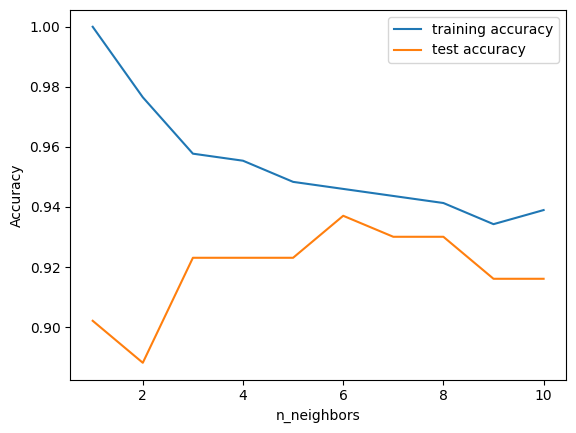

In [28]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
 # build the model
 clf = KNeighborsClassifier(n_neighbors=n_neighbors)
 clf.fit(X_train, y_train)
 # record training set accuracy
 training_accuracy.append(clf.score(X_train, y_train))
 # record generalization accuracy
 test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### KNN regression using the Wave dataset

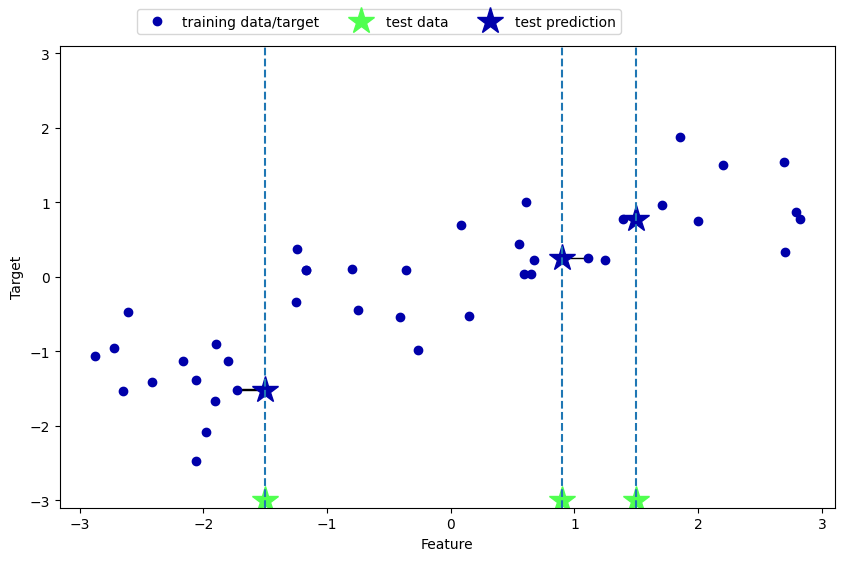

In [29]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

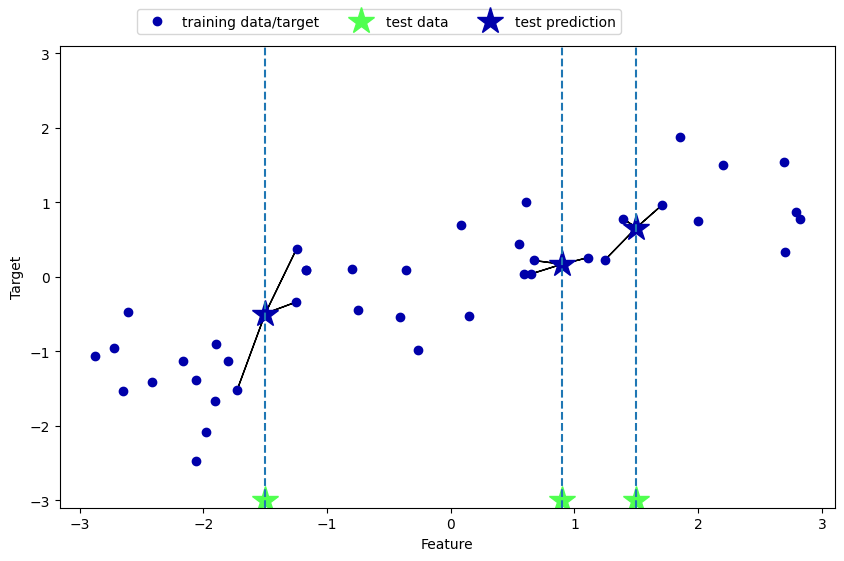

In [30]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [45]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=6)
reg.fit(X_train, y_train)

,n_neighbors,6
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [46]:
print("The test predictions are: {}".format(reg.predict(X_test)))

The test predictions are: [-1.12910019  0.44489157  0.44489157  0.80146185  0.44489157  0.45977041
  0.01956236  0.9890804   0.66881422 -0.16055963  1.14324599  0.73467238
 -0.45929642 -0.87728456  1.49603214  0.66881422 -0.24616961 -0.49949021
  0.76094274  0.66881422  1.01051774  1.32673569  0.66881422 -1.12910019
  0.24279142]


In [48]:
print("The model accuracy is {:.2f}".format(reg.score(X_test, y_test)))

The model accuracy is 0.75


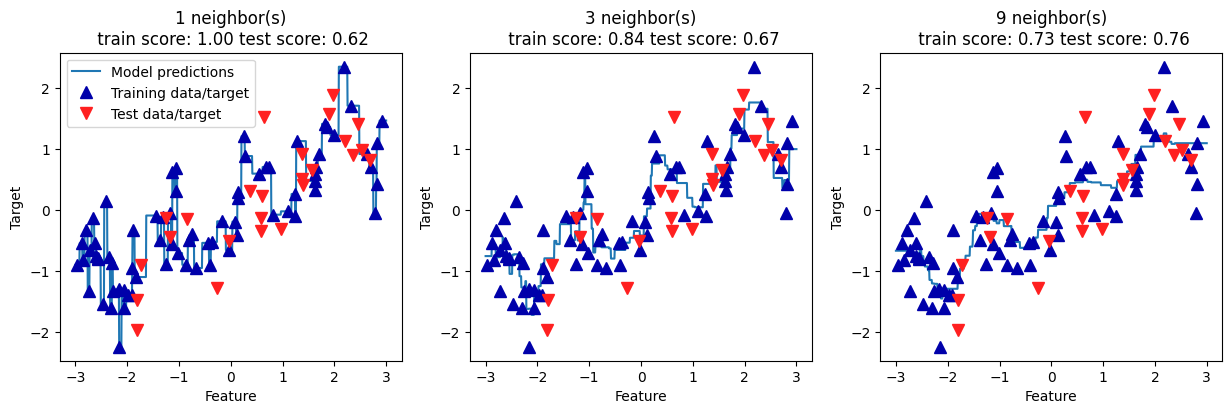

In [49]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
 # make predictions using 1, 3, or 9 neighbors
 reg = KNeighborsRegressor(n_neighbors=n_neighbors)
 reg.fit(X_train, y_train)
 ax.plot(line, reg.predict(line))
 ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
 ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
 ax.set_title(
 "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
 n_neighbors, reg.score(X_train, y_train),
 reg.score(X_test, y_test)))
 ax.set_xlabel("Feature")
 ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
 "Test data/target"], loc="best")